In [34]:
import time, os
import numpy as np, pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# 2163 total constraints
# iterate = [10, 25, 50, 100, 200, 500, 750, 1000, 1500, 2000, 2163]
iterate = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n = 10

g = open("allConstraints.txt", "rt")
constraint = g.readlines()
g.close()

num_files = len(iterate)
runningTime = iterate

means = []
lowerbound = []
upperbound = []

runtime_data = pd.DataFrame(columns=iterate, index=range(1,11))
synth_runtime = pd.DataFrame(columns=iterate, index=range(1, n+1))

### Testing data collection on random entries
- Making sure our constraints aren't duplicated

In [3]:
for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        
        arr_constraints = random.sample(range(0,2162), num_constraints)
        for i in range(1,11):
#             timeRun = createFile(arr_constraints)
            runtime_data.loc[i,num_constraints] = random.random()
    
runtime_data.to_csv('runtime_data.csv')

In [4]:
runtime_data

,10,20,30,40,50,60,70,80,90,100
1,0.970832,0.58614,0.992559,0.462594,0.967256,0.723406,0.517947,0.984043,0.422995,0.516825
2,0.248523,0.509638,0.938094,0.255876,0.141982,0.0468501,0.183012,0.792504,0.530693,0.928237
3,0.40207,0.741769,0.704114,0.804783,0.547359,0.382268,0.114964,0.0903201,0.603976,0.0160797
4,0.0415983,0.980683,0.387653,0.396824,0.559213,0.0352491,0.441269,0.625287,0.486252,0.514668
5,0.900614,0.335607,0.689128,0.102452,0.421786,0.439416,0.60586,0.0433855,0.332509,0.130759
6,0.166767,0.301087,0.730816,0.511757,0.520456,0.52881,0.580836,0.643152,0.514106,0.267516
7,0.828102,0.129544,0.443769,0.688975,0.0154351,0.315136,0.365371,0.612673,0.996536,0.65596
8,0.526535,0.0275125,0.455348,0.864939,0.941287,0.487225,0.808423,0.352604,0.790351,0.0449791
9,0.667355,0.807545,0.273201,0.599426,0.401552,0.585402,0.257626,0.63478,0.341067,0.281823
10,0.0253353,0.804306,0.339725,0.391777,0.993583,0.833554,0.814018,0.774154,0.142053,0.548434


### Updated code, saves to CSV file

In [163]:
def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        
        arr_constraints = random.sample(range(0,2162), num_constraints)
        for i in range(1,11):
            timeRun = createFile(arr_constraints)
            synth_runtime.loc[i,num_constraints] = timeRun
            arr_runtimes.append(timeRun)
            arr_constraints = []
    
runtime_data.to_csv('synth_runtime_anal.csv')


def createFile(constraints):
    f = open('mnist.smt2', 'w')
    # have this in a file to read from
    h = open("smtGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 mnist.smt2')

    runTime = time.time() - start_time
    
    # runs through getStates function to use for mean calculation
    return runTime
        

### the old code

In [163]:
def getStates():
    # run 10 times each iterate number to get 5 num summary and plot mean with variance
    for num_constraints in iterate:
        arr_constraints = [] # size i in iterate
        arr_runtimes = [] # size n
        for j in range(num_constraints*n + 1):
            arr_constraints.append(random.randrange(0, 2162))
    #             if we have enough constraints, then run a cvc5 file with these constrinats
            if ((j % num_constraints) == 0) & (j != 0): 
                    # run cvc5, gather runtime data, store somewhere
                timeRun = createFile(arr_constraints)
                arr_runtimes.append(timeRun)
                arr_constraints = []
        mean = np.mean(arr_runtimes)
        stdev = np.std(arr_runtimes)
        means.append(mean)
        lowerbound.append(mean - stdev)
        upperbound.append(mean + stdev)

def createFile(constraints):
    f = open('mnist.smt2', 'w')
    # have this in a file to read from
    h = open("smtGuts.txt", "r")
    for line in h:
        f.write(line)

    for j in constraints:
        f.write(constraint[j])

    f.write("(check-synth)")
    f.close()

    start_time = time.time()
    os.system('../../cvc5/build/bin/cvc5 --lang=sygus2 mnist.smt2')

    runTime = time.time() - start_time
    
    # runs through getStates function to use for mean calculation
    return runTime
        

### Runs everything

In [164]:
getStates()

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

(
(define-fun rig_mimic ((b0_0 Real) (b0_1 Real) (b0_2 Real) (b0_3 Real) (b0_4 Real) (b0_5 Real) (b0_6 Real) (b0_7 Real) (b0_8 Real) (b0_9 Real) (b0_10 Real) (b0_11 Real) (b0_12 Real) (b0_13 Real) (b0_14 Real) (b0_15 Real) (b0_16 Real) (b0_17 Real) (b0_18 Real) (b0_19 Real) (b0_20 Real) (b0_21 Real) (b0_22 Real) (b0_23 Real) (b0_24 Real) (b0_25 Real) (b0_26 Real) (b0_27 Real) (b1_0 Real) (b1_1 Real) (b1_2 Real) (b1_3 Real) (b1_4 Real) (b1_5 Real) (b1_6 Real) (b1_7 Real) (b1_8 Real) (b1_9 Real) (b1_10 Real) (b1_11 Real) (b1_12 Real) (b1_13 Real) (b1_14 Real) (b1_15 Real) (b1_16 Real) (b1_17 Real) (b1_18 Real) (b1_19 Real) (b1_20 Real) (b1_21 Real) (b1_22 Real) (b1_23 Real) (b1_24 Real) (b1_25 Real) (b1_26 Real) (b1_27 Real) (b2_0 Real) (b2_1 Real) (b2_2 Real) (b2_3 Real) (b2_4 Real) (b2_5 Real) (b2_6 Real) (b2_7 Real) (b2_8 Real) (b2_9 Real) (b2_10 Real) (b2_11 Real) (b2_12 Real) (b2_13 Real) (b2_14 Real) (b2_15 Real) (b2_16 Real) (b2_17 Real) (b2_18 Real) (b2_19 Real) (b2_20 Real) (b2_

### Data manipulation, get from CSV file/dataframe of runtimes

In [5]:
means = []
lowerbound = []
upperbound = []

for i in iterate:
    data = runtime_data[i]
    mean = data.mean()
    stdev = data.std()
    lowbound = mean - stdev
    upbound = mean + stdev
    means.append(mean)
    lowerbound.append(lowbound)
    upperbound.append(upbound)

print(f"means: {means}; lowerbound: {lowerbound}; upperbound: {upperbound}")

means: [0.47777312226935775, 0.5223830941817936, 0.5954406200210689, 0.5079403602004577, 0.5509908898470546, 0.43773168374966165, 0.4689326525175752, 0.5552902879672138, 0.5160538731407275, 0.3905280527634941]; lowerbound: [0.12297891974441216, 0.2050555765313017, 0.3439863128083465, 0.26929246522888317, 0.2150605390489585, 0.17873247305987544, 0.2259885192097113, 0.2516901931450242, 0.2738911686687494, 0.09804342063536547]; upperbound: [0.8325673247943033, 0.8397106118322856, 0.8468949272337913, 0.7465882551720323, 0.8869212406451507, 0.6967308944394479, 0.7118767858254391, 0.8588903827894034, 0.7582165776127056, 0.6830126848916227]


### Plot function

In [83]:
def plotRunTime():
    z = np.polyfit(iterate, means, 1)
    p = np.poly1d(z)

    fontsize = 16
    plt.rcParams.update({'font.size': fontsize})
    rc('font', **{'family': 'serif', 'serif': ['Times']})
    rc('text', usetex=True)

    c = '#ff0000'
    plt.fill_between(iterate, lowerbound, upperbound, color = '#FF9F9F')
    plt.plot(iterate, means, color = c, marker = 'o')
    
#     plt.plot(iterate, p(iterate), linestyle = '--', color = c)
    plt.legend(['Mean', 'Mean $\pm$ stdev'])
    plt.xlabel('Number of Constraints', size = fontsize)
    plt.ylabel('Runtime (seconds)', size=fontsize)
    plt.title('CVC5 Runtime on Varied Number of Constraints (MNIST)', size = fontsize + 2)
    plt.xticks([20, 40, 60, 80, 100], ['20', '40', '60', '80', '100'])
    plt.yticks([0, 0.5, 1.0], ['0.0', '0.5', '1.0'])    
    plt.margins(x = 0)
    plt.savefig('MNIST.pdf')
    plt.show()

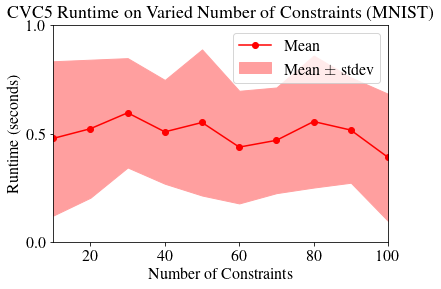

In [84]:
plotRunTime()

In [19]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        